In [52]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

import contractions
import re
#1 is positive review and 0 is negative review 

In [32]:
movie_review_df =  pd.read_csv("Train.csv")

In [33]:
print(movie_review_df)

                                                    text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]


label
0    20019
1    19981
Name: count, dtype: int64


<Axes: xlabel='label'>

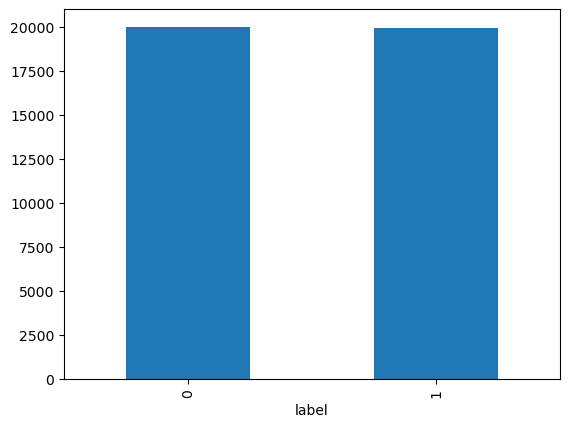

In [34]:
movie_review_df.isnull().sum()
print(movie_review_df['label'].value_counts())
movie_review_df['label'].value_counts().plot(kind='bar')

In [36]:
#Tokenization
# There are 3 methods to tokenize words 
# 1. Using NLTK 2.Using Spacy and 3. Using HuggingFace Tokenizer: Used for transformer models 

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\viraj\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\viraj\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\viraj\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [37]:
def tokenize(text):
    return tokenizer.tokenize(text)

movie_review_tokens = movie_review_df['text'].apply(tokenize)

In [43]:
print(movie_review_tokens)

0        [i, grew, up, (, b, ., 1965, ), watching, and,...
1        [when, i, put, this, movie, in, my, dvd, playe...
2        [why, do, people, who, do, not, know, what, a,...
3        [even, though, i, have, great, interest, in, b...
4        [im, a, die, hard, dad, ##s, army, fan, and, n...
                               ...                        
39995    [", western, union, ", is, something, of, a, f...
39996    [this, movie, is, an, incredible, piece, of, w...
39997    [my, wife, and, i, watched, this, movie, becau...
39998    [when, i, first, watched, flat, ##liner, ##s, ...
39999    [why, would, this, film, be, so, good, ,, but,...
Name: text, Length: 40000, dtype: object


In [44]:
def process_reviews(dataframe):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Convert text to lowercase
    dataframe['text'] = dataframe['text'].apply(lambda x: x.lower())
    
    # Remove punctuation
    dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Remove numbers
    dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'\d+', '', x))
    
    # Remove stopwords
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    
    # Remove rare words
    # word_freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()
    # rare_words = word_freq[word_freq <= 1]
    # dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
    
    # Lemmatization
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))
    
    return dataframe

In [47]:
pmr_train= process_reviews(movie_review_df)

In [48]:
valid_mr = pd.read_csv('Valid.csv')
pmr_valid = process_reviews(valid_mr)

In [49]:
test_mr = pd.read_csv('Test.csv')
pmr_test = process_reviews(test_mr)

In [50]:
print(pmr_train)

                                                    text  label
0      grew b watching loving thunderbird mate school...      0
1      put movie dvd player sat coke chip expectation...      0
2      people know particular time past like feel nee...      0
3      even though great interest biblical movie bore...      0
4      im die hard dad army fan nothing ever change g...      1
...                                                  ...    ...
39995  western union something forgotten classic west...      1
39996  movie incredible piece work explores every noo...      1
39997  wife watched movie plan visit sicily stromboli...      0
39998  first watched flatliners amazed necessary feat...      1
39999  would film good gross estimated award nominati...      1

[40000 rows x 2 columns]


In [51]:
train_x = pmr_train['text']
train_y = pmr_train['label']

valid_x = pmr_valid['text']
valid_y = pmr_valid['label']



In [53]:
CV = CountVectorizer()

CV.fit(train_x)

CountVectorizer()

In [54]:
x_train_count = CV.transform(train_x)
x_valid_count = CV.transform(valid_x)
x_test_count = CV.transform(pmr_test['text'])

In [56]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
LR_model = LogisticRegressionCV(cv =6, penalty='l2',random_state=0, max_iter=1000)

In [58]:
LR_model.fit(x_train_count, train_y)

LogisticRegressionCV(cv=6, max_iter=1000, random_state=0)

In [59]:
valid_predictions = LR_model.predict(x_valid_count)
valid_accuracy = accuracy_score(valid_y, valid_predictions)
print(f'Validation Accuracy: {valid_accuracy:.2f}')

print("Classification Report:")
print(classification_report(valid_y, valid_predictions))

print("Confusion Matrix:")
print(confusion_matrix(valid_y, valid_predictions))

# Step 6: Classify the Test Data
test_predictions = LR_model.predict(x_test_count)
pmr_test['predicted_label'] = test_predictions

Validation Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2486
           1       0.88      0.90      0.89      2514

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Confusion Matrix:
[[2169  317]
 [ 249 2265]]


In [63]:
op_review = "The first half is definitely the best one. Its great to see Saul is alive and find out more about Dragon. He is one of the most interesting characters in the story, but we know very little about him. Learning more about his past in the Freedom Fighters and his motivation will be a highlight of the anime. Vegapunk also seems like an interesting character. At the same time, he knows he can change the Navy from inside, he doesnt deny he is there for the resources too. Even though he has a benevolent side, he also has a greedy nature. The second half is interesting and explores more what he thinks about knowledge. This part is also great at showing his duality, and Bonney even calls it out. Building such a great sea of information that anyone can access would be amazing, but he doesnt care about its possible downsides. Hopefully, this arc will keep diving deeper into this aspect and show the differences between him and all of his clones too."

In [66]:
def predict_sentiment(custom_review, vectorizer, model):
    # Preprocess the custom review

    custom_df = pd.DataFrame({'text': [custom_review]})
    
    # Preprocess the review using process_reviews function
    processed_df = process_reviews(custom_df)
    
    # Vectorize the processed review
    review_vector = vectorizer.transform(processed_df['text'])
    
    # Predict sentiment
    prediction = model.predict(review_vector)
    
    # Convert numerical prediction to label
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    
    return sentiment

In [68]:
op_badreview = "The pacing was slow and the characters, especially Dragon and Vegapunk, were poorly developed. Dragon's backstory felt rushed, and Vegapunk's actions were inconsistent and unconvincing."

In [69]:
custom_sentiment = predict_sentiment(op_badreview,CV,LR_model)
print(custom_sentiment)

negative
